# **Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises, text describing your code and answering any questions included in the exercise descriptions should be provided as part of your submitted solution. (Total Marks for this Assessment is 40)

Note - We also provide an example test data set ('Test_data_example.csv' and 'Test_data_example_targets.csv'). This is just an example of the final test set (which will not be provided to you) that will be used to evaluate your solutions when your submitted solutions are being marked. Part of this assessment requires you to write an inference script that evaluates the regression models you have trained on the final test data set such that we are able to run the inference script ourselves on the test data (you can use the example test data to verify that it works prior to submission).

The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

In [182]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Define paths to the training data and targets files
training_data_path = 'Training_data.csv'
training_targets_path = 'Training_data_targets.csv'

# **Exercise 1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other. (5 marks)

#### **Data check**

In the first part of exercise 1, the data set is checked for any unsual features.

array([[<AxesSubplot: title={'center': 'avgAnnCount'}>,
        <AxesSubplot: title={'center': 'avgDeathsPerYear'}>,
        <AxesSubplot: title={'center': 'incidenceRate'}>,
        <AxesSubplot: title={'center': 'medIncome'}>,
        <AxesSubplot: title={'center': 'popEst2015'}>,
        <AxesSubplot: title={'center': 'povertyPercent'}>],
       [<AxesSubplot: title={'center': 'studyPerCap'}>,
        <AxesSubplot: title={'center': 'MedianAge'}>,
        <AxesSubplot: title={'center': 'MedianAgeMale'}>,
        <AxesSubplot: title={'center': 'MedianAgeFemale'}>,
        <AxesSubplot: title={'center': 'AvgHouseholdSize'}>,
        <AxesSubplot: title={'center': 'PercentMarried'}>],
       [<AxesSubplot: title={'center': 'PctNoHS18_24'}>,
        <AxesSubplot: title={'center': 'PctHS18_24'}>,
        <AxesSubplot: title={'center': 'PctSomeCol18_24'}>,
        <AxesSubplot: title={'center': 'PctBachDeg18_24'}>,
        <AxesSubplot: title={'center': 'PctHS25_Over'}>,
        <AxesSubpl

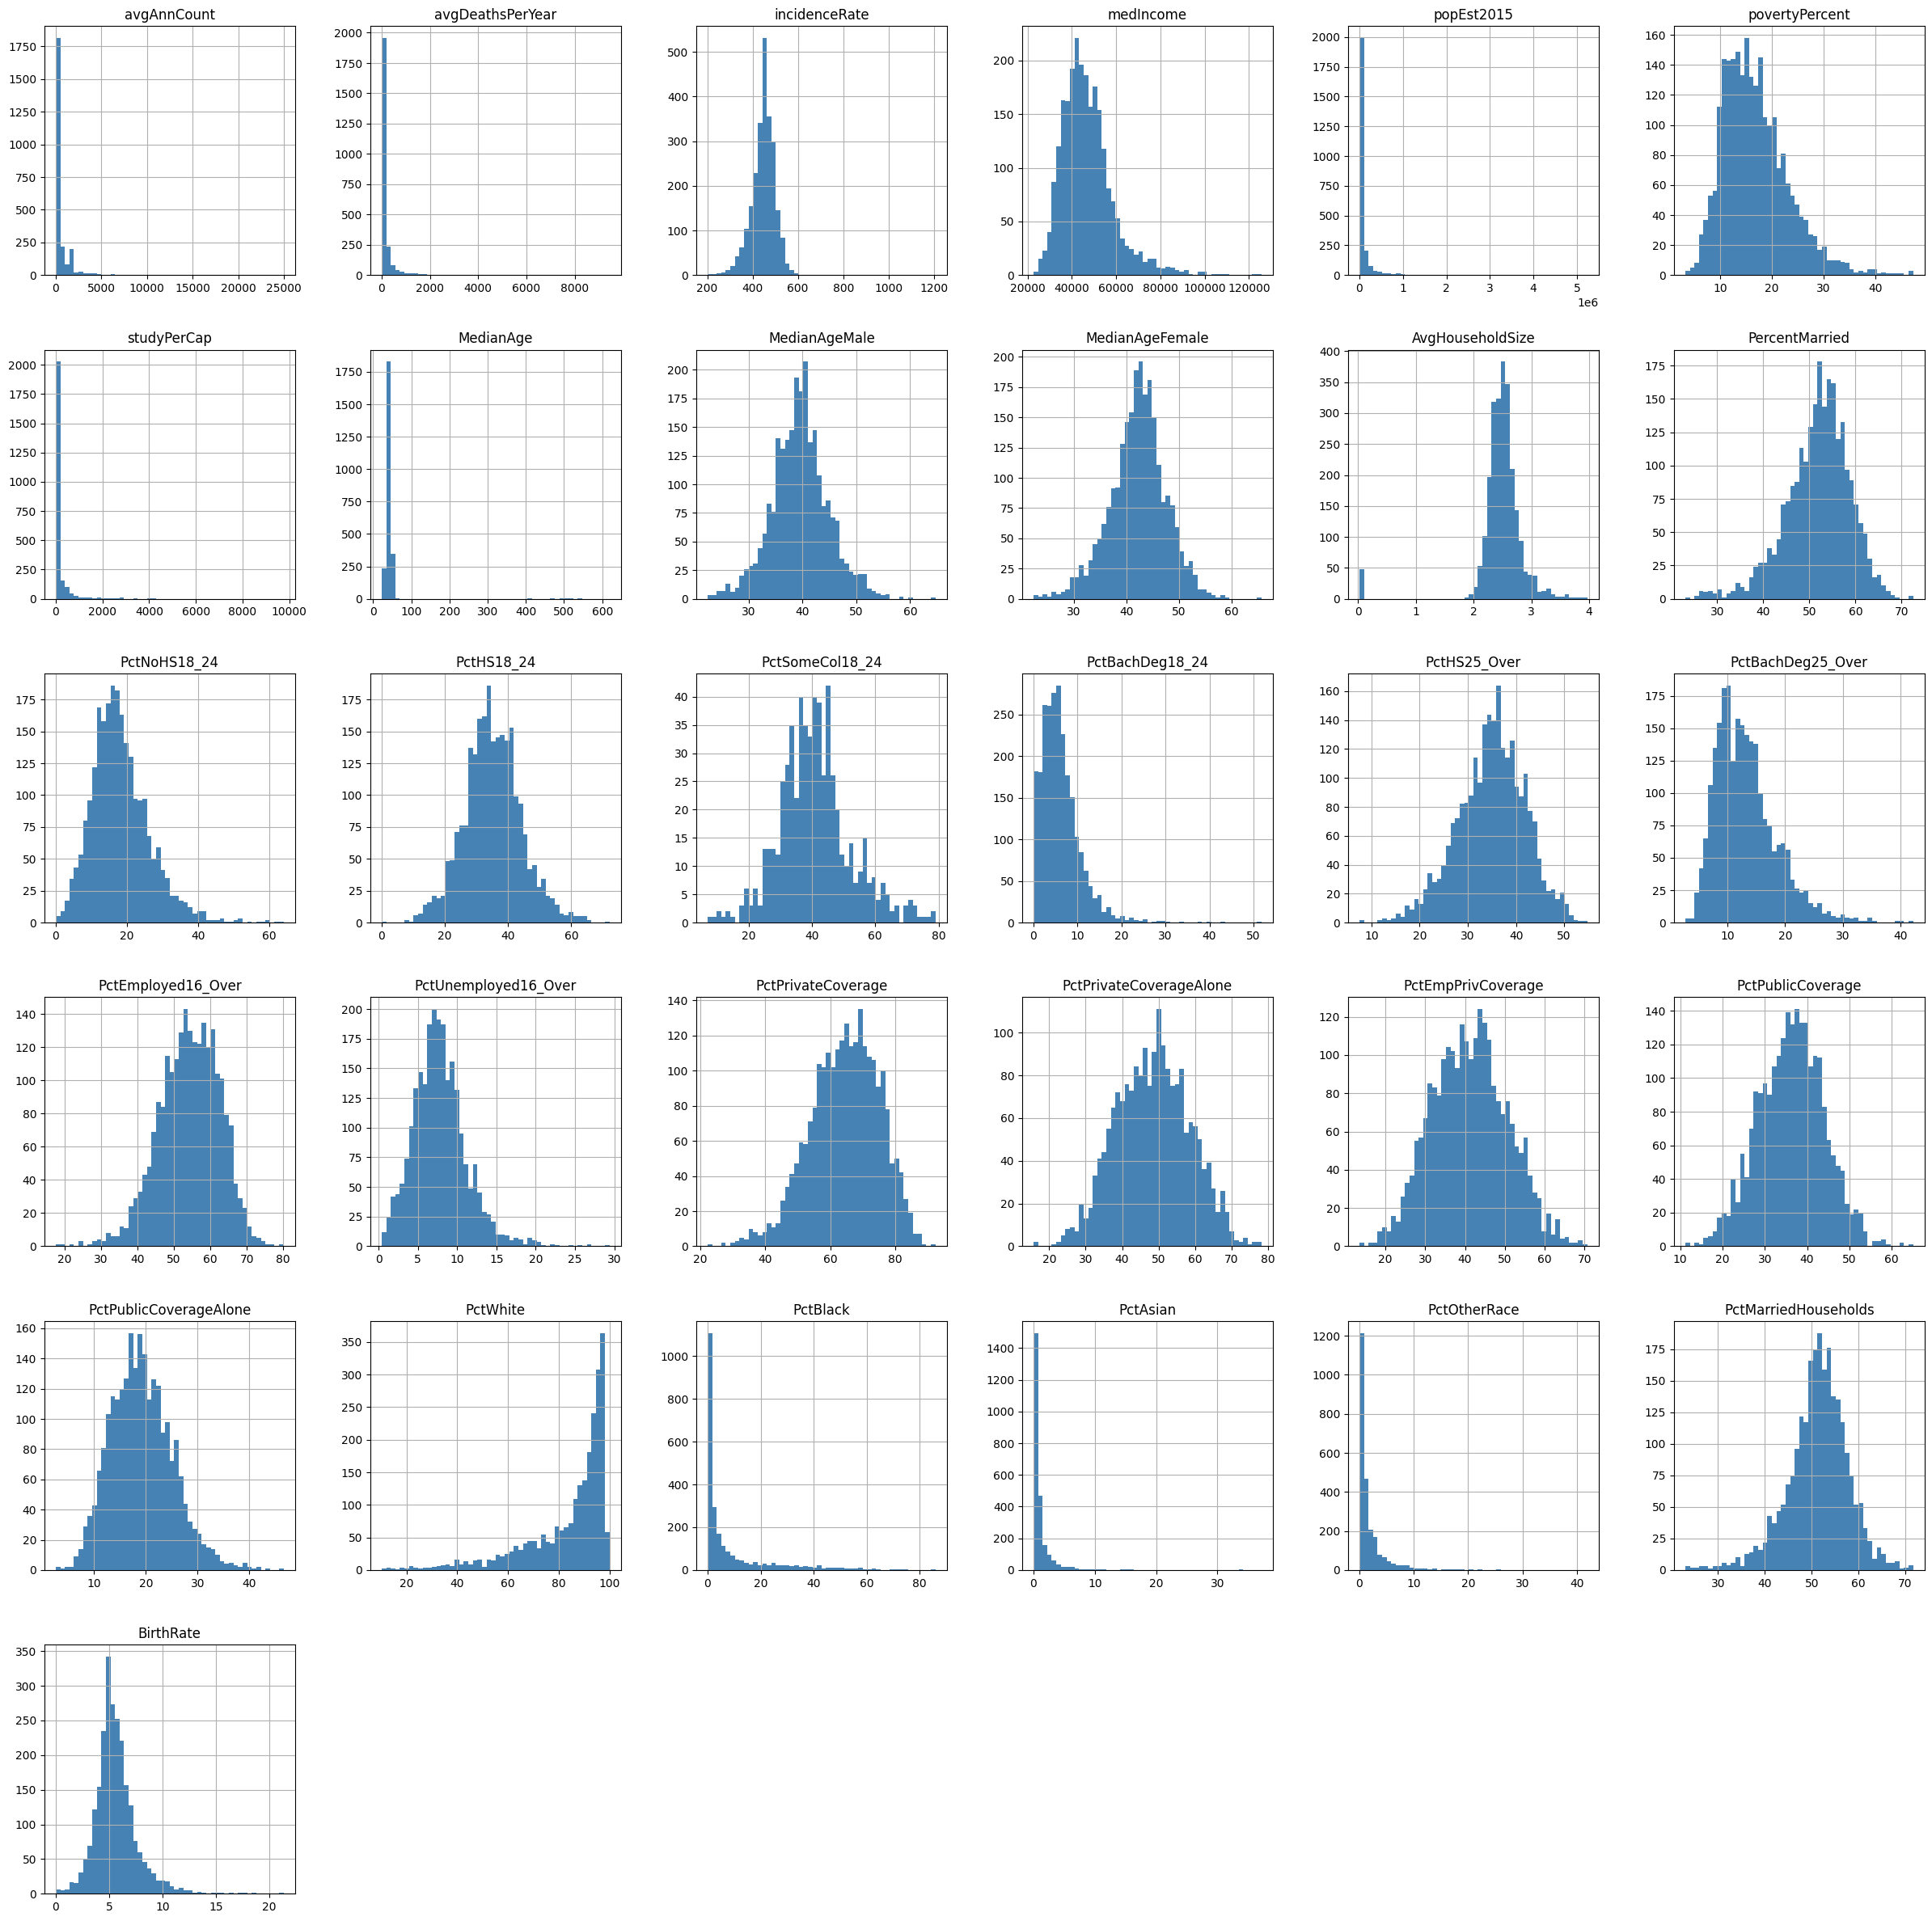

In [183]:
# Plot histograms to visualize all data
%matplotlib inline
plot_color = 'steelblue'
cancer_data = pd.read_csv(training_data_path)
cancer_data.hist(bins=50,figsize=(30,30), color=plot_color)

In [184]:
cancer_data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,59.0,30,404.3,33975,8251,20.5,0.0,51.3,50.8,51.9,...,NaN,26.0,49.7,20.6,96.684036,0.438181,0.082899,0.272383,51.926207,5.041436
1,114.0,41,403.8,47363,22702,13.8,0.0,40.8,39.8,42.7,...,56.5,46.8,31.6,13.0,92.295459,2.102845,0.609648,0.879131,50.949545,6.329661
2,33.0,11,352.0,77222,9899,6.8,0.0,38.1,36.9,39.8,...,65.4,54.3,18.2,8.6,95.690422,0.000000,0.523871,0.118612,64.532156,5.148130
3,254.0,100,429.6,80650,48904,7.5,0.0,43.5,42.7,44.1,...,64.2,55.6,28.8,13.5,89.606996,7.407407,0.870370,0.450617,62.344481,5.627462
4,75.0,32,407.5,42839,22255,14.6,0.0,31.1,30.2,31.6,...,50.7,46.5,26.8,18.1,79.587990,2.948701,8.482564,5.637090,63.005948,10.436469


array([[<AxesSubplot: title={'center': 'TARGET_deathRate'}>]],
      dtype=object)

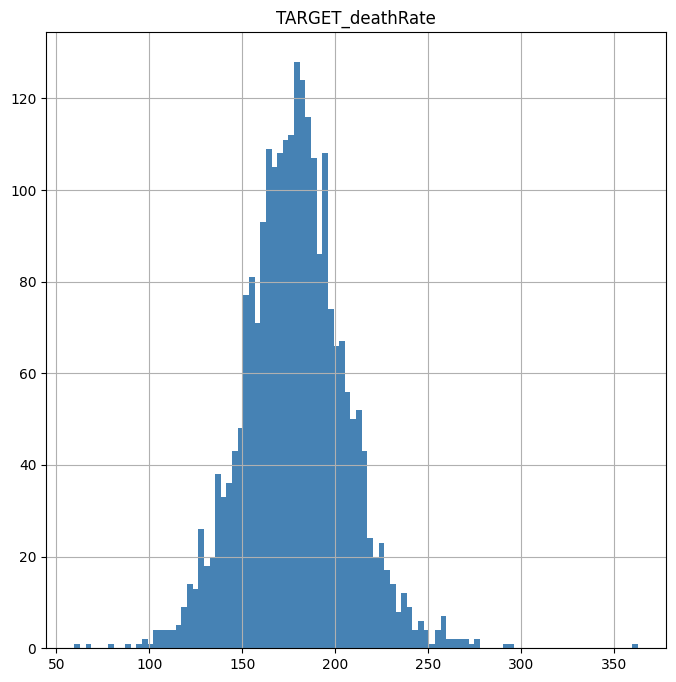

In [185]:
target = "TARGET_deathRate"
target_data = pd.read_csv(training_targets_path)
target_data.hist(bins=100,figsize=(8,8), color=plot_color)

In [186]:
# Further checks
from tabulate import tabulate

data_table = []
head = ["Column name", "Mean", "Standard deviation", "#entries>3std", "#entries<3std", "#entries>5std", "#entries<5std"]

# Find entries that are outside of the standard deviation
for column in cancer_data:
    mean = cancer_data[column].mean()
    std = cancer_data[column].std()
    count_above_std3 = 0
    count_below_std3 = 0
    count_above_std5 = 0
    count_below_std5 = 0

    for entry in cancer_data[column]:
        if entry < mean - std*3:
            count_below_std3 += 1
        elif entry > mean + std*3:
            count_above_std3 += 1

        if entry < mean - std*5:
            count_below_std5 += 1
        elif entry > mean + std*5:
            count_above_std5 += 1

    data_table.append([column, format(mean, '.4f'), format(std, '.4f'), count_above_std3, count_below_std3, count_above_std5, count_below_std5]) # add data for every column

print(tabulate(data_table, headers=head, tablefmt="grid"))

+-------------------------+-------------+----------------------+-----------------+-----------------+-----------------+-----------------+
| Column name             |        Mean |   Standard deviation |   #entries>3std |   #entries<3std |   #entries>5std |   #entries<5std |
+=========================+=============+======================+=================+=================+=================+=================+
| avgAnnCount             |    598.333  |            1288.68   |              36 |               0 |              18 |               0 |
+-------------------------+-------------+----------------------+-----------------+-----------------+-----------------+-----------------+
| avgDeathsPerYear        |    183.717  |             456.439  |              43 |               0 |              20 |               0 |
+-------------------------+-------------+----------------------+-----------------+-----------------+-----------------+-----------------+
| incidenceRate           |    447.878  |

In [187]:
# Incorrect data
count_entries_above66 = 0

for entry in cancer_data['MedianAge']:
    if entry > 66:
        count_entries_above66 += 1

print('The total number of entries above 66 years in MedianAge is', count_entries_above66)

The total number of entries above 66 years in MedianAge is 26


<AxesSubplot: >

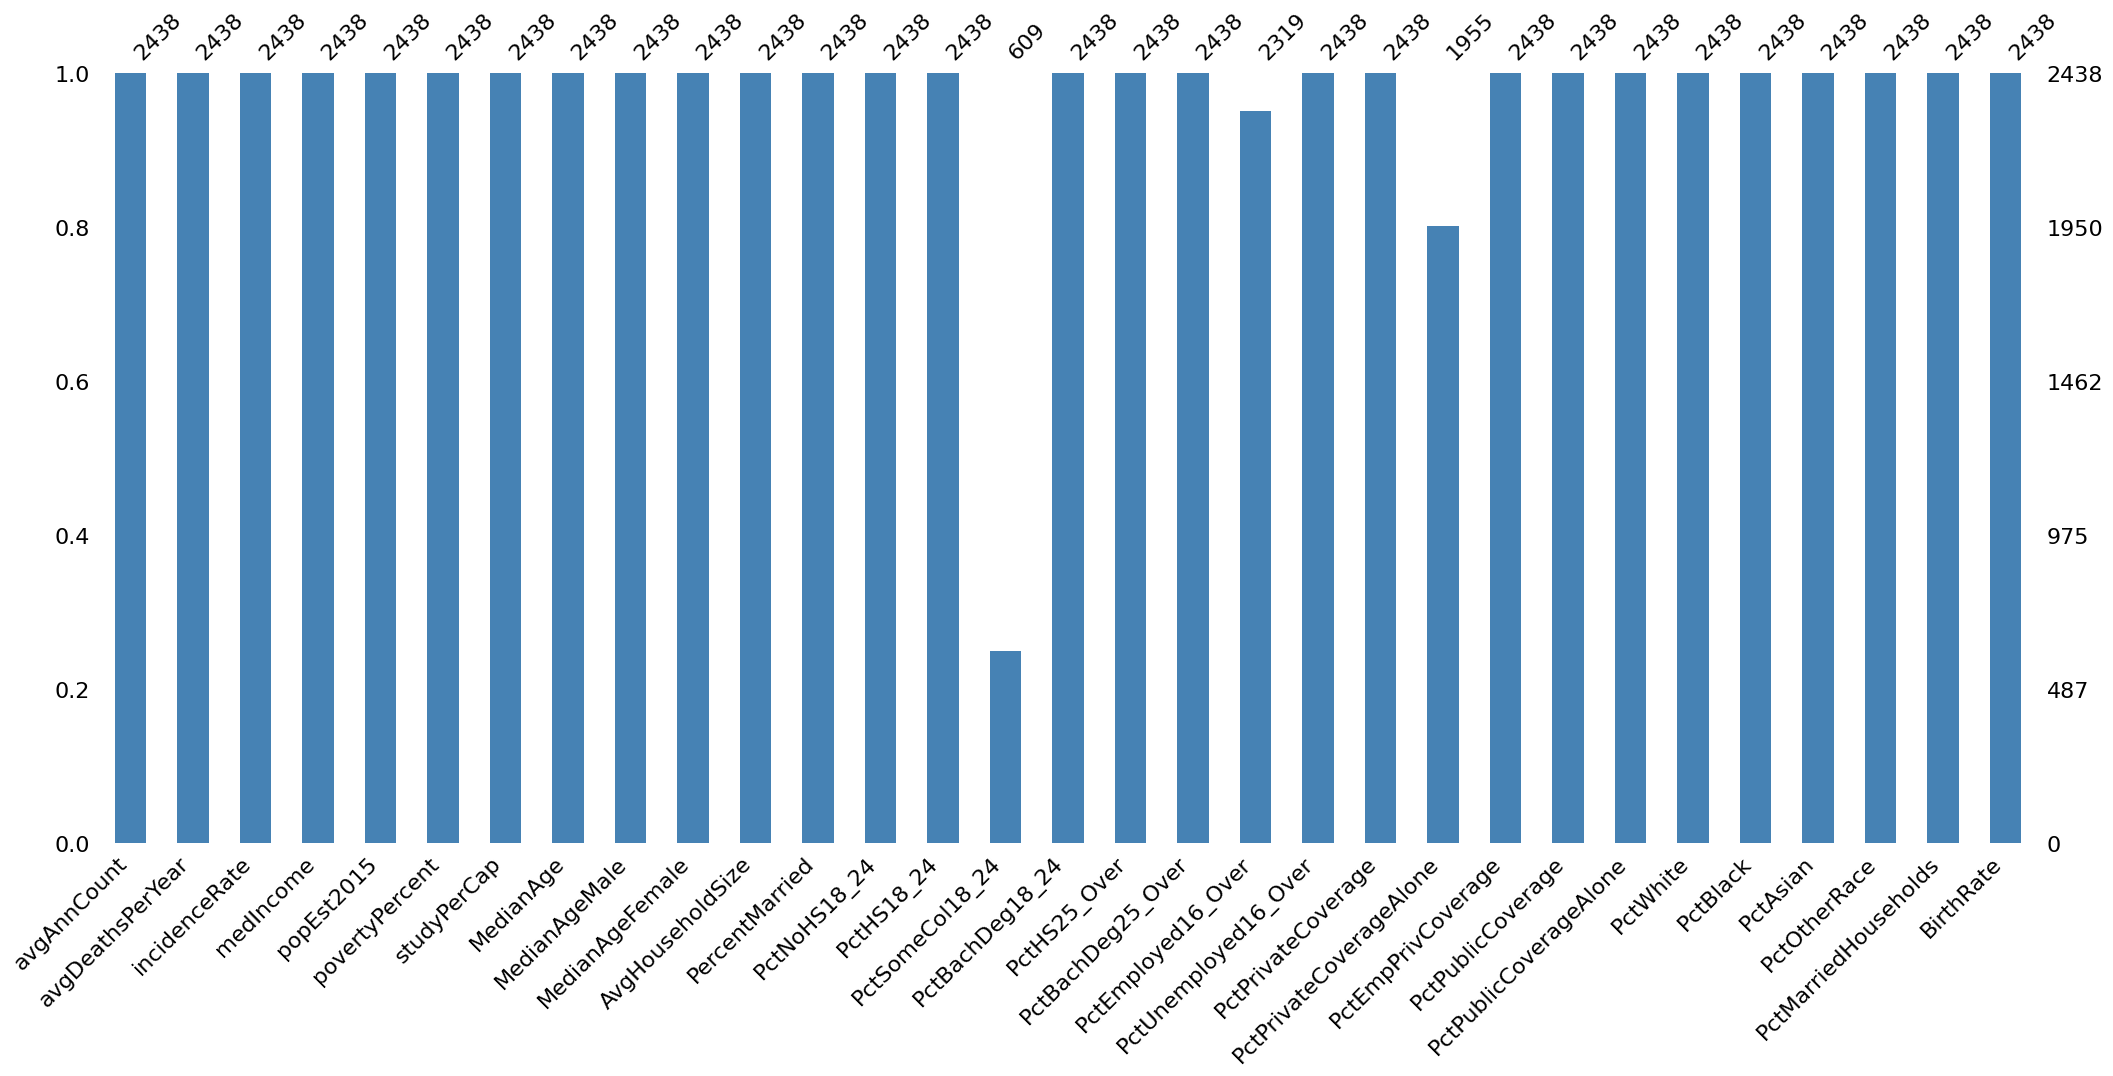

In [188]:
# Missing data
import missingno as msno
msno.bar(cancer_data, color=plot_color)

<AxesSubplot: >

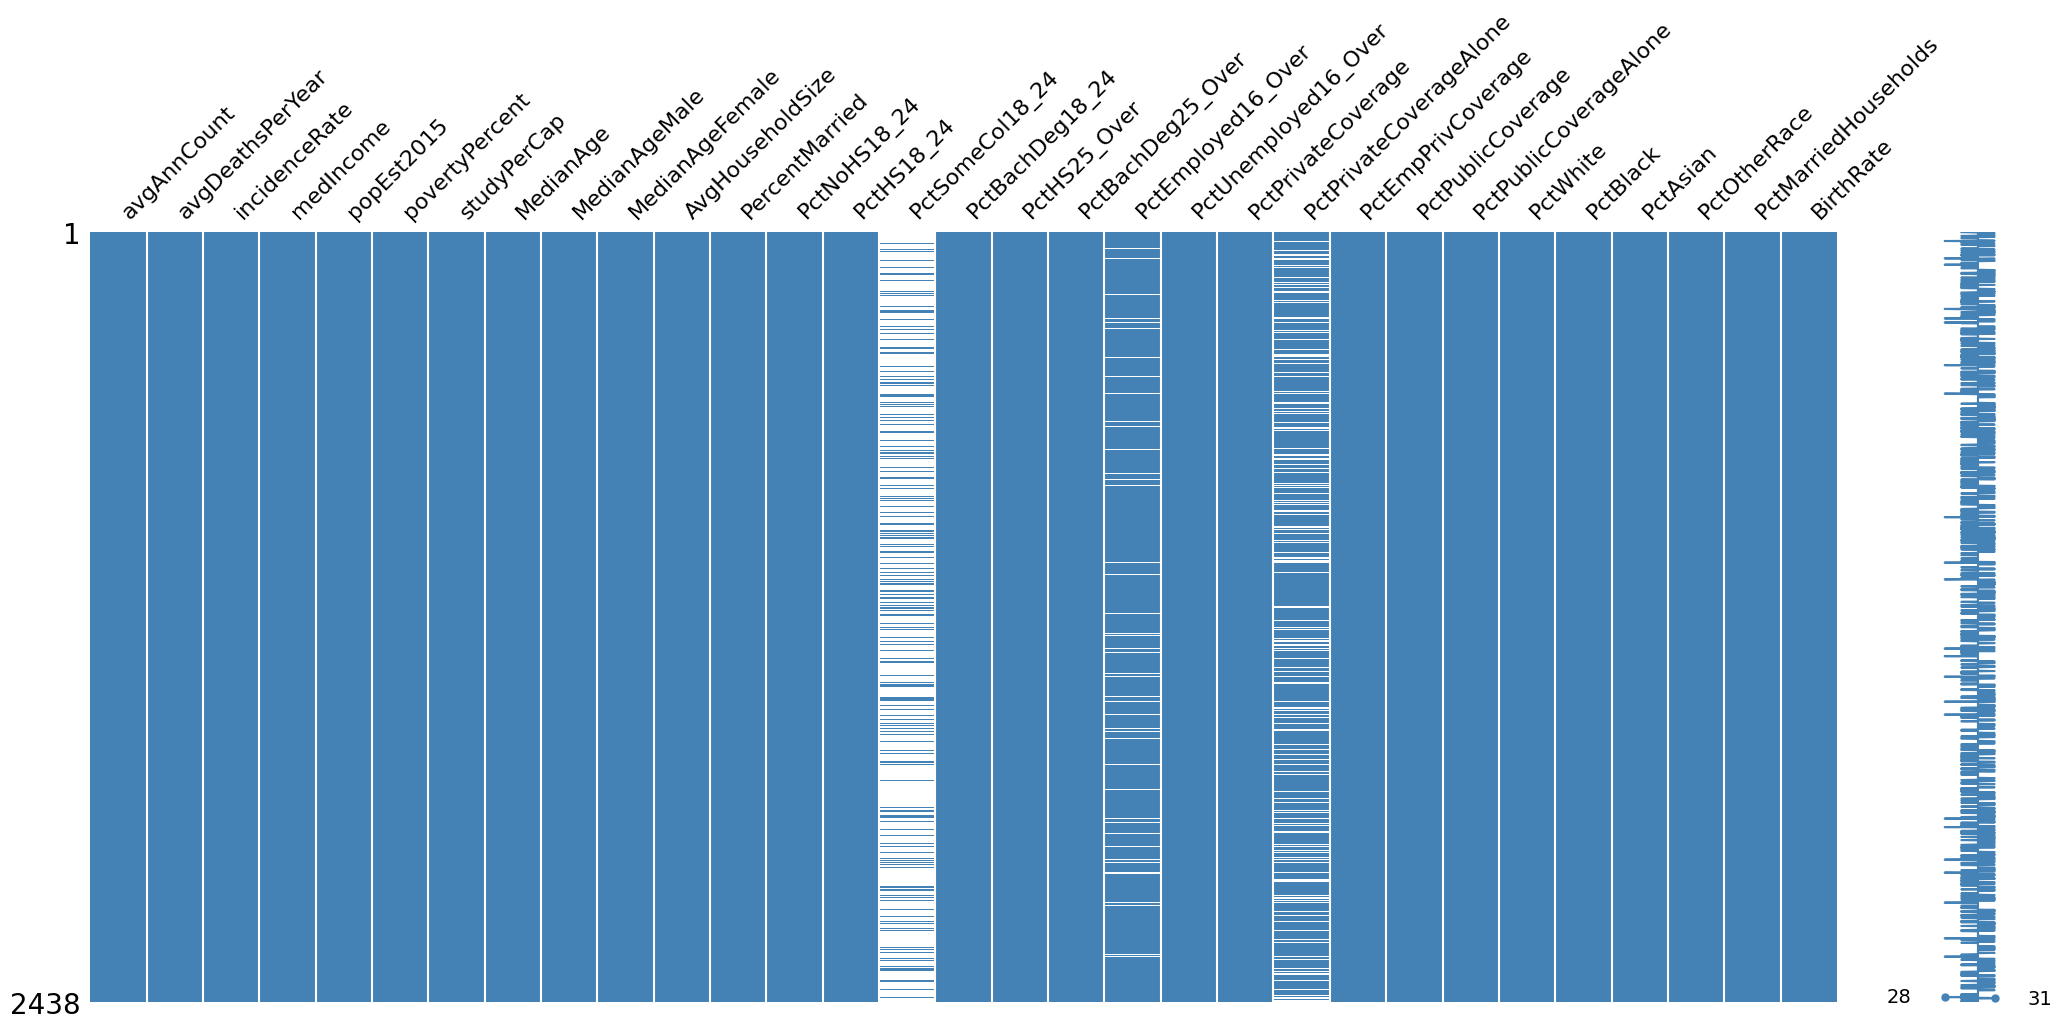

In [189]:
msno.matrix(cancer_data, color=(0.27, 0.51, 0.71)) # check if missing data is random across the set

There are a few columns that contain unusual data:
- The highest median age for male is 64.7, and the highest medial age for female population is 65.7. In the 'MedianAge' column there are 26 entries that are above 66 years, all of them being in the 100th scale. These entries are clearly a mistake and they should be replaced;
- In an usual Gaussian Distribution, data that is outside of 3 standard deviations is very rare and, therefore, can be replaced from the machine learning pipeline. In this exercise, due to the data size limitation, only values that are above or below 5 std will be replaced:
  - The AvgHouseholdSize has 48 entries that are below 5 standard deviation;
  - A few entries for PctNoHS18_24 (3), PctBachDeg18_24 (8), PctBachDeg25_Over (3), PctUnemployed16_Over (4);
  - The other categories that show high standard deviations are PctBlack, PctAsian and PctOtherRace, but they are not Gaussian distributed.
  

Most columns have 2438 entries, but some do not:

- PctSomeCol18_24 has null values in 1829 positions out of 2438. It was decided to remove the column from the pipeline because:
  - A low percentage (24.98%) of the entries have a value;
  - It has a fairly low correlation to the target data. It has a correlation of 0.19 and additional data would not improve this number.


- PctEmployed16_Over has null values in 119 positions out of 2438. It was decided to keep the column and replace the missing data because:
  - A high percentage (95.12%) of the entries have a value;
  - It is a Gaussian distribution, with missing values at random locations. This allows us to replace the nan values with gaussian distributed data;
  - It has a high correlation with the target values (0.40) compared to other features.


- PctPrivateCoverageAlone has null values in 483 positions out of 2438. It was decided to keep the column and replace the missing data because:
  - A high percentage (80.11%) of the entries have a value;
  - PctPrivateCoverageAlone has a resonably high correlation with the target data (0.36) compared to most of the other categories;
  - It is a Gaussian distribution, with missing values at random locations. This allows us to replace the nan values with gaussian distributed data.

#### **Correlation**
In the second part of the excercise, the correlation is checked between the target value and the rest of the data set. 

Correlation of PctBachDeg25_Over with the target value is -0.4914 | Slope of the line -0.1969
Correlation of incidenceRate with the target value is 0.444 | Slope of the line 0.573
Correlation of PctPublicCoverageAlone with the target value is 0.4397 | Slope of the line 0.203
Correlation of medIncome with the target value is -0.4166 | Slope of the line -0.2846
Correlation of povertyPercent with the target value is 0.4133 | Slope of the line 0.1713


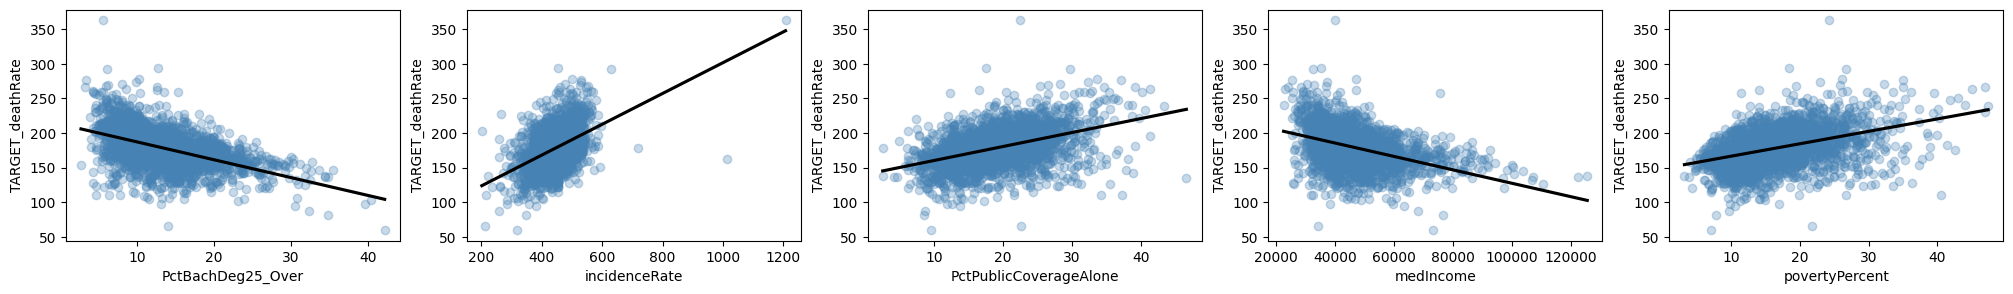

In [190]:
import seaborn as sns

# Check correlation
full_data = cancer_data.copy()
full_data.insert(1, target, target_data)

corr_matrix=full_data.corr()
correlation = corr_matrix[target] 
high_correclation = correlation.sort_values(ascending=False, key=abs)[1:6].index # get the abs highest 5 values

# Create plots
incr = 0
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 3))

for feature in high_correclation:
   sns.regplot(x=full_data[feature], y=full_data[target], data=full_data, scatter_kws={'color': plot_color, 'alpha':0.3}, line_kws={'color': 'black'}, ci=None, ax=axes[incr])
   incr += 1
   print('Correlation of', feature, 'with the target value is', round(correlation[feature],4), '| Slope of the line', round(np.polyfit(np.log(full_data[feature]), np.log(full_data[target]), 1)[0],4))

In the tables above, the first five best linear correlations can be observed. It can be seen how the cancer average death rate is associated in a positive ('incidentRate', 'PctPublicCoverageAlone', 'povertyPercent') or negative ('PctBachDeg25_Over', 'medIncome') way to these values. 

The 'medIncome' has a negative linear correlation of approximately -0.42 with the target death rate, meaning that counties with higher incomes tend to have lower numbers of cancer deaths. Higher income counties are more likely to have advanced medical institutions that can identify and treat cancer cases faster. It is known that death from certain cancer types may be avoided if there is treatment in the early stages of the disease. As a result, the scatter plot of the 'medIncome' shows how te number of deaths due to cancer gets smaller as the income increases. The correlation is not exactly proportional as the slope of the linear regression model fit by seaborn is around -28.5°; this implies that cases of cancer do not drop linearly with the income of the county. 

The 'incidenceRate' has a fairly high positive linear correlation to the target data (0.44). This is expected because a larger number of diagnosed cases causes higher numbers of deaths due to cancer. It can be seen that the slop of of the linear regression model fit by seaborn is approximately 57.3°. This indicates that the death date is reasonably proportional to the incident rate. 

In the section below, scatter plots were created for all the features in the dataset. These plots can show how the target data can, actually, have a lower/higher colerration with certain features if outliers are removed. This is something that has to be considered in the machine learning pipeline. For example, 'PctPrivateCoverageAlone' may have a fairly high negative correlation of -0.36 with the target data due to its outliers. This feature will probably have a lower correlation because entries with high deviations should be replaced from the data used in the pipeline. It will be interesting to observe if its weight is smaller compared to weights from other features that currently have lower absolute correlations.  

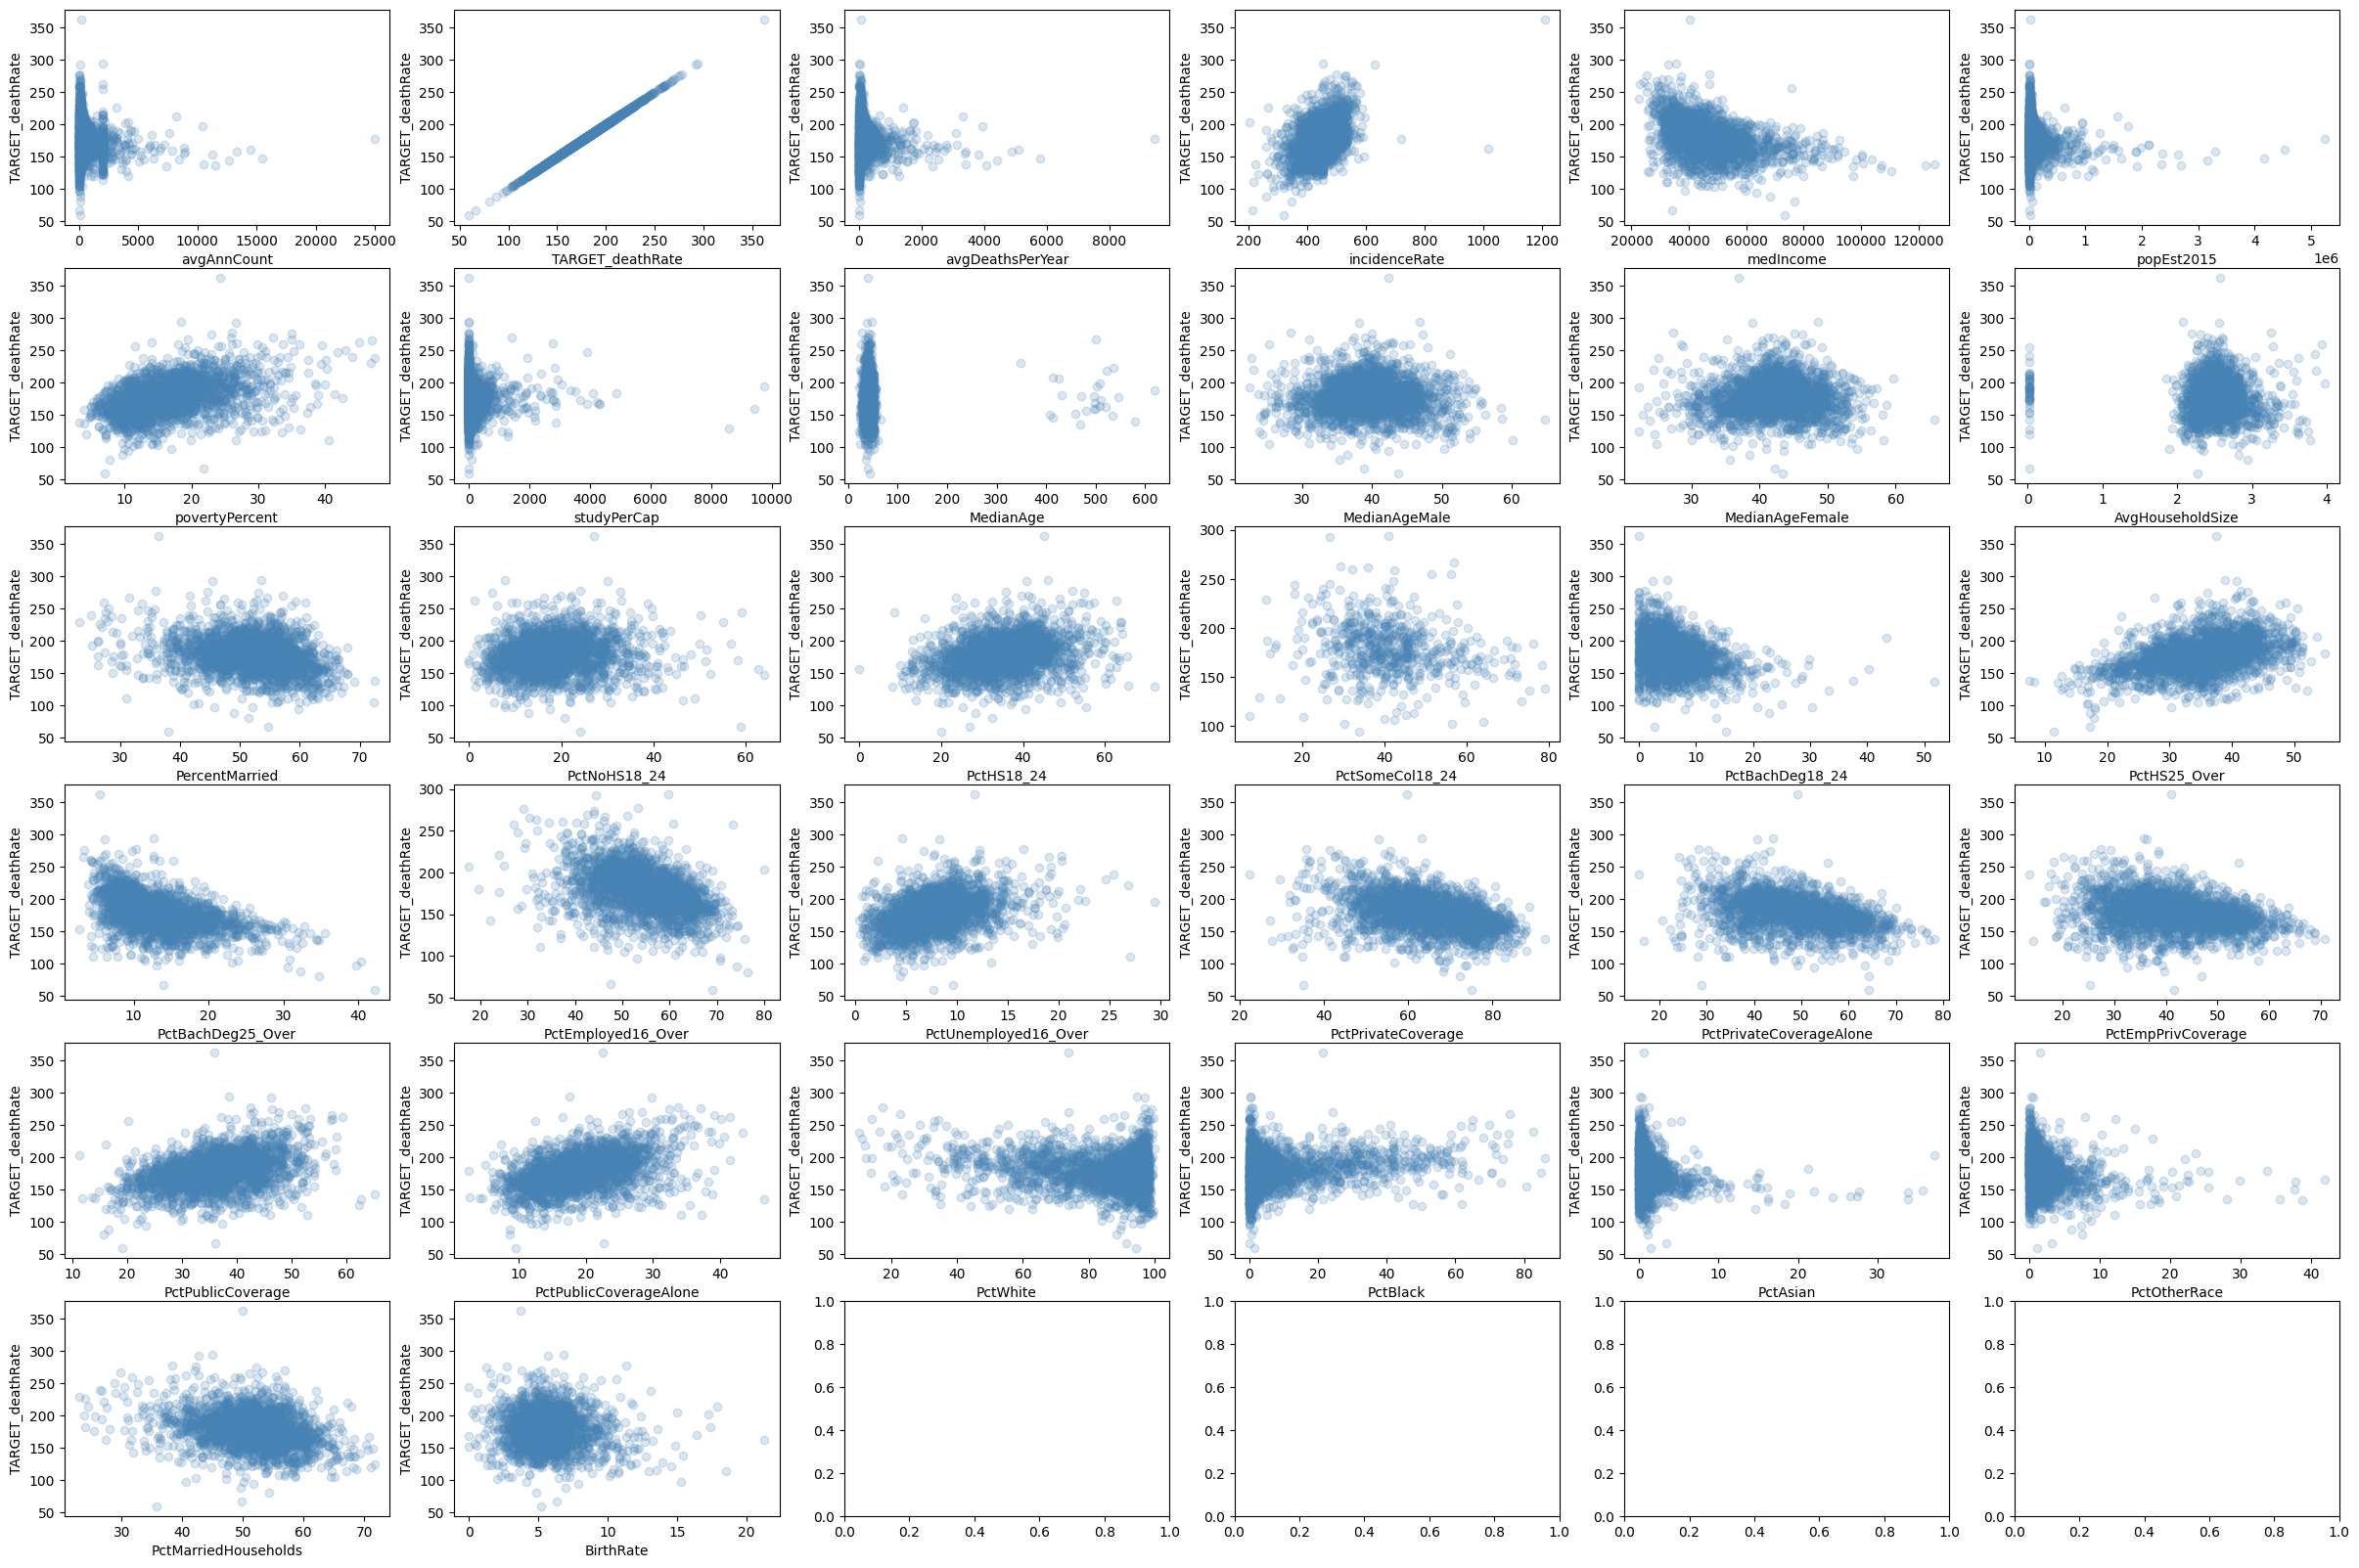

In [191]:
incr_1 = 0
incr_2 = 0

fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(30, 20))

for feature in full_data:
   axes[incr_1][incr_2].scatter(x=full_data[feature], y=full_data[target].values, alpha=0.2, color=plot_color)
   axes[incr_1][incr_2].set_xlabel(feature)
   axes[incr_1][incr_2].set_ylabel(target)
   if (incr_2 + 1) < 6:
      incr_2 += 1
   else:
      incr_2 = 0
      incr_1 += 1

In [192]:
corr_matrix[target].sort_values(ascending=False, key=abs)

TARGET_deathRate           1.000000
PctBachDeg25_Over         -0.491411
incidenceRate              0.443983
PctPublicCoverageAlone     0.439734
medIncome                 -0.416607
povertyPercent             0.413260
PctHS25_Over               0.409915
PctEmployed16_Over        -0.400317
PctPublicCoverage          0.391899
PctPrivateCoverage        -0.382786
PctUnemployed16_Over       0.362612
PctPrivateCoverageAlone   -0.355050
PctMarriedHouseholds      -0.290645
PctBachDeg18_24           -0.284566
PctHS18_24                 0.266285
PercentMarried            -0.266153
PctEmpPrivCoverage        -0.259006
PctBlack                   0.236380
PctSomeCol18_24           -0.186140
PctOtherRace              -0.182602
PctAsian                  -0.181948
PctWhite                  -0.174521
avgAnnCount               -0.150019
popEst2015                -0.130122
avgDeathsPerYear          -0.094048
PctNoHS18_24               0.090565
BirthRate                 -0.088543
AvgHouseholdSize          -0

Another way of calculation correlation is the p-value in order to observe the posibility of the null hypothesis. All the high correlation features have a p-value way below 0.05, but four cathegories (mentioned below) have high p_values. It can be argued that these features have low statistical significance to the target data and may be removed from the pipeline. 

In [193]:
from scipy import stats

for feature in full_data:
   if full_data[feature].isnull().any() == False:
      p_value = stats.pearsonr(full_data[target], full_data[feature])[1]

      if p_value > 0.05:
         print('p-value for', feature, 'is', format(p_value, '.4f'))

p-value for studyPerCap is 0.2222
p-value for MedianAge is 0.9985
p-value for MedianAgeMale is 0.1784
p-value for MedianAgeFemale is 0.6689


# **Exercise 2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (3 marks)

In [194]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

def preprocess(data, target):
    data_1 = drop(data, target)
    data_2 = replace_high_std(data_1)
    X_train, X_test, y_train, y_test = split_data(data_2, target)
    return X_train, X_test, y_train, y_test


# Drop columns 
def drop(data, target):
        data_len = len(data.axes[0])

        # Columns that miss more than half of the total number of entries
        for column in data:
            if data[column].isnull().any():
                if data[column].notnull().sum() < (data_len/2):
                    data = data.drop(column,axis=1)                    
                    print(column, 'has been removed from the pipeline because it misses more than half of the entries.')
            
            # Columns that have low p_values
            else:
                if stats.pearsonr(np.squeeze(np.asarray(target)), data[column])[1] > 0.05 and data_len > 1000:
                    data = data.drop(column,axis=1)
                    print(column, 'has been removed from the pipeline because it has a high p_value.')

        return data


# Replace data that is at five std
def replace_high_std(data):
    for column in data:
            mean = data[column].mean()
            median = data[column].median()
            std = data[column].std()
            
            for entry in data[column]:
                if ((mean - std*5) >= entry) or ((mean + std*5) <= entry):
                    entry = median

    return data


def split_data(data, target):
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size= 0.3, random_state=1) # 70%-30% split between train and test
    return X_train, X_test, y_train, y_test


In [195]:
data_train, data_test, target_train, target_test = preprocess(cancer_data, target_data)

# Return contiguous arrays
target_train = target_train.values.ravel()
target_test = target_test.values.ravel()

studyPerCap has been removed from the pipeline because it has a high p_value.
MedianAge has been removed from the pipeline because it has a high p_value.
MedianAgeMale has been removed from the pipeline because it has a high p_value.
MedianAgeFemale has been removed from the pipeline because it has a high p_value.
PctSomeCol18_24 has been removed from the pipeline because it misses more than half of the entries.


In [196]:
print("The dimension of train is {}".format(data_train.shape))
print("The dimension of test is {}".format(data_test.shape))

data_train.head()

The dimension of train is (1706, 26)
The dimension of test is (732, 26)


,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
745,98.0,42,455.8,36801,18778,24.0,2.43,50.7,4.8,25.0,...,42.2,33.6,40.6,26.0,68.094984,28.788687,0.266809,1.659552,50.423845,4.350707
1252,126.0,61,442.0,33181,16185,20.3,2.43,58.2,15.3,39.7,...,NaN,27.4,52.2,24.0,96.579171,0.255195,0.716977,0.236967,57.439188,5.886451
917,875.0,327,479.9,46892,203976,18.0,2.75,42.1,8.7,23.6,...,58.3,50.2,29.4,16.0,66.148520,30.583464,1.473127,0.629059,46.865236,5.461320
2043,245.0,87,447.8,58792,53585,10.2,2.95,55.1,21.3,31.3,...,58.0,53.4,30.8,17.2,87.411562,2.211658,1.305454,6.595978,59.523416,5.621302
125,19.0,8,348.6,51201,3348,10.0,2.19,58.9,21.0,30.4,...,58.8,36.3,32.0,9.9,98.814815,0.000000,0.296296,0.000000,53.311258,3.642987


In [197]:
from sklearn.base import BaseEstimator

class SelectAttributes(BaseEstimator):

    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.attribute_names].values

In [198]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

pipeline = Pipeline([
    ('slc_attribs', SelectAttributes(list[data_train])),
    ('imputer', KNNImputer(n_neighbors=5, weights="uniform")),
    ('std_scaler', StandardScaler())
])

In [199]:
cancer_prepared = pipeline.fit_transform(data_train)    # prepare data for the machine learning model training
cancer_test = pipeline.transform(data_test)             # prepare data for the machine learning model testing
cancer_prepared

array([[-0.37700246, -0.30151906,  0.13878799, ..., -0.0943112 ,
        -0.12751869, -0.64057741],
       [-0.35678652, -0.26277217, -0.10476558, ..., -0.51222972,
         0.94546361,  0.14292043],
       [ 0.18398994,  0.27968433,  0.5641243 , ..., -0.39704308,
        -0.67180061, -0.07397049],
       ...,
       [10.72154995, 11.40004258, -0.82130724, ...,  1.2361193 ,
        -0.64560584, -0.10923831],
       [ 0.96928377, -0.21586803,  0.09906797, ..., -0.26617306,
        -0.30358614,  0.12254296],
       [-0.41310236, -0.35250181,  0.34527906, ..., -0.58184441,
         0.57216244,  1.07595881]])

Exercise 2 focuses on the filtering of the data. 

Firstly, based on the analysis performed for exercise 1, columns are dropped when required, high standard deviation entries are replaced and data is split between test and train. In this case, columns that miss half of the entries and that have a low correlation are removed from the pipeline. As shown in execise 1, entries that are outside of the mean by five standard deviatians are replaced by the median value. Median value was chosen as the replacing value because it mitigates the effects of the outliners (especially for the features that are non-symmetric distributed). The train-test split was set to 70-30 because it is a standard split used in machine learning pipelines.

Secondly, the filtered data is then passed through the pipeline in order to impute any missing values and scale the data set. Scaling is important because different machine learning models are sensitive to the range of the data points. It is better to keep all of the values on the same scale so that the weights are not affected. 

A nearest neighbors imputation strategy is used to replace the missing data from the set. Originally, a simple imputation was used with a "median" strategy, but, after checking the data in exercise 1, all of the features that need imputation are Gaussian distributed. It is better to replace the missing data with a Gaussian distributed set of values compared to a constant. k-Nearest Neighbors offers the advantage of tuning the missing values by using the neighboring entries.

# **Exercise 3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Include code for all steps above. (10 marks)


In [200]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def display_performance(model, X_train, X_test, y_train, y_test): 
    # Train prediction
    train_pred = model.predict(X_train)
    train_mse = np.sqrt(mean_squared_error(y_train, train_pred))
    train_score = format(r2_score(y_train, train_pred)*100, '.2f')

    # Test prediction
    test_pred = model.predict(X_test)
    test_mse = np.sqrt(mean_squared_error(y_test, test_pred))
    test_score = format(r2_score(y_test, test_pred)*100, '.2f')

    print('TRAIN: Accuracy: {}%'.format(train_score))           
    print('TRAIN: Root mean squared error:', format(train_mse, '.2f'))   
    print('TEST:  Accuracy: {}%'.format(test_score))           
    print('TEST:  Root mean squared error:', format(test_mse, '.2f'))    

In [201]:
# OLS model
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(cancer_prepared, target_train)

display_performance(lin_reg, cancer_prepared, cancer_test, target_train, target_test)

TRAIN: Accuracy: 54.59%
TRAIN: Root mean squared error: 18.75
TEST:  Accuracy: 46.23%
TEST:  Root mean squared error: 19.63


For the Lasso and Ridge regularization, the hyperparameter, lambda, will be tuned by using a cross validation. The LassoCV and RidgeCV will be used to fit the data because they incorporate the r^2 scoring for the grid search in their model. 

The optimization objective for LassoCV used in sklearn is:
$$
L(w) = {\frac{1}{2n}} \sum^n_{i=1} (y_i - Xw)^2 + \alpha \sum^n_{j=1} w
$$

In [202]:
# Lasso
from sklearn.linear_model import Lasso, LassoCV

lasso = LassoCV() # Lasso Cross validation, 5 cv by default
lasso.fit(cancer_prepared, target_train)

lasso_best = Lasso(alpha=lasso.alpha_)
lasso_best.fit(cancer_prepared, target_train)

display_performance(lasso_best, cancer_prepared, cancer_test, target_train, target_test)
print('Best alpha:', lasso.alpha_)    

best_lasso_alpha = lasso.alpha_

TRAIN: Accuracy: 54.58%
TRAIN: Root mean squared error: 18.75
TEST:  Accuracy: 46.29%
TEST:  Root mean squared error: 19.62
Best alpha: 0.013985048659677193


(0.00990065624302518, 19.75440629517019, 308.84356009844254, 910.3541289770811)

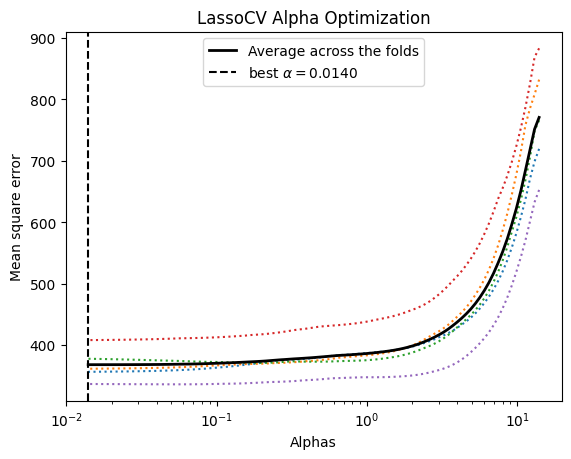

In [203]:
# Show how the lasso alpha was computed using the error for each fold

# plot the performance of each fold
plt.plot(lasso.alphas_, lasso.mse_path_, ":")

# plot the performance average
plt.plot(lasso.alphas_ ,lasso.mse_path_.mean(axis=-1), color="black", label="Average across the folds", linewidth=2)

# Draw a dashed vertical line at the alpha
alpha_label = "best $\\alpha={:0.4f}$".format(lasso.alpha_)
plt.axvline(lasso.alpha_, color="black", linestyle="--", label=alpha_label)

plt.legend()
plt.title("LassoCV Alpha Optimization")
plt.xlabel("Alphas")
plt.ylabel("Mean square error")
plt.xscale('log')
plt.axis("tight")

The optimization objective of RidgeCV inside sklearn can be seen below. By default, the RigdeCV performs efficient Leave-One-Out Cross-Validation which requires positive alphas.
$$
L(w) = \sum^n_{i=1} (y_i - Xw)^2 + \alpha w^2
$$

In [204]:
# Ridge model
from sklearn.linear_model import Ridge, RidgeCV

alphas = np.linspace(0.1, 100.0, 500)

ridge = RidgeCV(alphas=alphas, store_cv_values=True) # Ridge Cross validation
ridge.fit(cancer_prepared, target_train)

ridge_best = Ridge(alpha=ridge.alpha_)
ridge_best.fit(cancer_prepared, target_train)

display_performance(ridge_best, cancer_prepared, cancer_test, target_train, target_test)
print('Best alpha:', ridge.alpha_)    

TRAIN: Accuracy: 54.53%
TRAIN: Root mean squared error: 18.76
TEST:  Accuracy: 46.34%
TEST:  Root mean squared error: 19.61
Best alpha: 13.513426853707417


(-4.895000000000001, 104.995, 367.576230914502, 371.1586052950804)

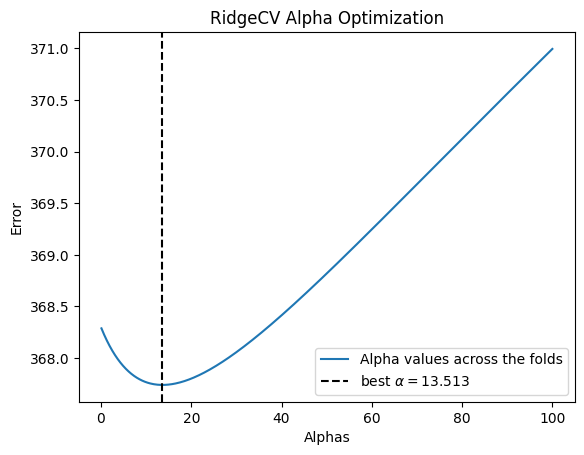

In [205]:
# Show how the ridge alpha was computed

# Plot the alpha against the error
plt.plot(ridge.alphas, ridge.cv_values_.mean(0), label="Alpha values across the folds")

# Draw a dashed vertical line at the alpha
alpha_label = "best $\\alpha={:0.3f}$".format(ridge.alpha_)
plt.axvline(ridge.alpha_, color="black", linestyle="--", label=alpha_label)

plt.legend()
plt.title("RidgeCV Alpha Optimization")
plt.xlabel("Alphas")
plt.ylabel("Error")
plt.axis("tight")

The Lasso and Ridge regressions are used to minimize the weights of the model. The linear regression model may overfit the training data and not work as expected on the test data. On the graph below, it can be seen how the regularized regressions converged to slightly smaller weights compared to the linear model. Despite the small reduction, the performance of Lasso and Ridge is not much higher compared to the linear regression performance.

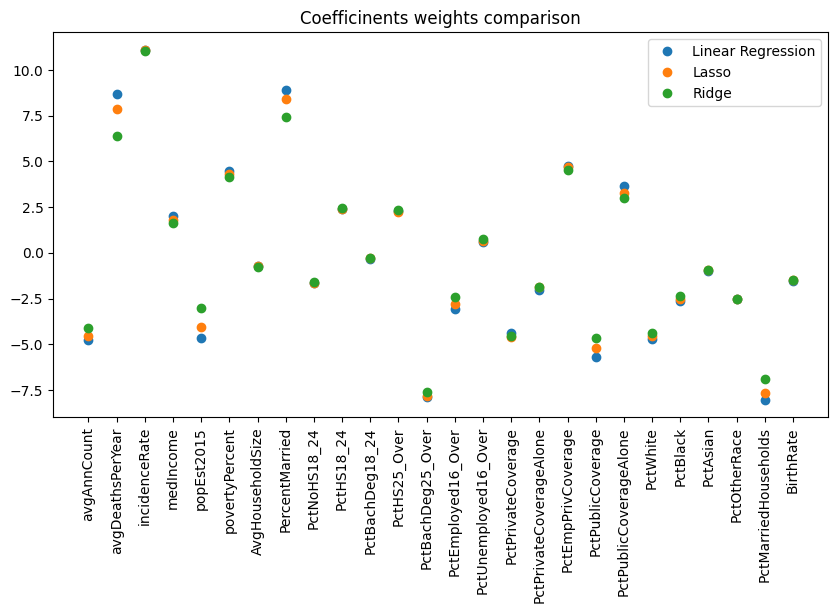

In [206]:
# Plot the coefficients for the linear, lasso and ridge models
plt.figure(figsize = (10, 5))
plt.title('Coefficinents weights comparison')
plt.plot(data_train.columns, lin_reg.coef_, linestyle='none', marker='o', label='Linear Regression')
plt.plot(data_train.columns, lasso.coef_,   linestyle='none', marker='o', label='Lasso')
plt.plot(data_train.columns, ridge.coef_,   linestyle='none', marker='o', label='Ridge')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

# **Exercise 4**

Use Lasso regression and the best regularisation weight identified from Exercise 3 to identify the five most important/relevant features for the provided data set and regression task. Report what these are desceding order of their importance. (5 marks)

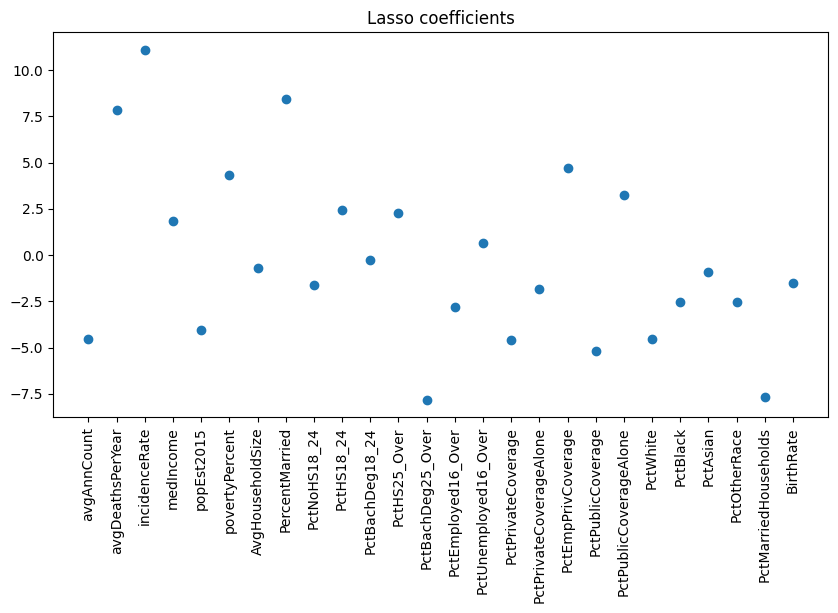

In [207]:
plt.figure(figsize = (10, 5))
plt.title('Lasso coefficients')
plt.plot(data_train.columns, lasso.coef_, linestyle='none', marker='o')
plt.xticks(rotation = 90)
plt.show()


In [208]:
features = pd.Series(lasso.coef_, data_train.columns)

lasso_weights = features.sort_values(ascending=False, key=abs)
print(lasso_weights)

incidenceRate              11.104564
PercentMarried              8.418695
avgDeathsPerYear            7.875378
PctBachDeg25_Over          -7.817649
PctMarriedHouseholds       -7.661446
PctPublicCoverage          -5.177151
PctEmpPrivCoverage          4.702445
PctPrivateCoverage         -4.580435
avgAnnCount                -4.556865
PctWhite                   -4.543561
povertyPercent              4.340853
popEst2015                 -4.050240
PctPublicCoverageAlone      3.272145
PctEmployed16_Over         -2.802686
PctOtherRace               -2.525936
PctBlack                   -2.508445
PctHS18_24                  2.420469
PctHS25_Over                2.262742
PctPrivateCoverageAlone    -1.852456
medIncome                   1.823685
PctNoHS18_24               -1.617001
BirthRate                  -1.498177
PctAsian                   -0.915347
AvgHouseholdSize           -0.717495
PctUnemployed16_Over        0.640505
PctBachDeg18_24            -0.268656
dtype: float64


The features with the highest coefficients are listed above. It is interesting to see how they have changed compared to the correlation conducted at the beginning of the report (in exercise 1):

In [209]:
coef_table = []
coef_head = ["Fields", "Initial Correlation", "Lasso Features"]
weights = pd.Series(lasso.coef_, data_train.columns)

for field in data_train.columns:
    coef_table.append([field, correlation[field], weights[field]])

print(tabulate(coef_table, headers=coef_head, tablefmt="grid"))

+-------------------------+-----------------------+------------------+
| Fields                  |   Initial Correlation |   Lasso Features |
+=========================+=======================+==================+
| avgAnnCount             |            -0.150019  |        -4.55686  |
+-------------------------+-----------------------+------------------+
| avgDeathsPerYear        |            -0.0940476 |         7.87538  |
+-------------------------+-----------------------+------------------+
| incidenceRate           |             0.443983  |        11.1046   |
+-------------------------+-----------------------+------------------+
| medIncome               |            -0.416607  |         1.82368  |
+-------------------------+-----------------------+------------------+
| popEst2015              |            -0.130122  |        -4.05024  |
+-------------------------+-----------------------+------------------+
| povertyPercent          |             0.41326   |         4.34085  |
+-----

It can be seen how the 'incidenceRate' remained the most important feature of the set. 'PctBachDeg25_Over' is still in the top five for the weights values, but the rest of the categhories changes after the pipeline was applied. This can be due to the removel of the outliners and the scaling process of the dataset.

In [210]:
print('Lasso regression most important features:', lasso_weights[0:5].index)
print('Initial high correlation features:', high_correclation)

Lasso regression most important features: Index(['incidenceRate', 'PercentMarried', 'avgDeathsPerYear',
       'PctBachDeg25_Over', 'PctMarriedHouseholds'],
      dtype='object')
Initial high correlation features: Index(['PctBachDeg25_Over', 'incidenceRate', 'PctPublicCoverageAlone',
       'medIncome', 'povertyPercent'],
      dtype='object')


# **Exercise 5**

Fit a Random Forest regression model to the training data and quantitatively evaluate and compare the Random Forest regression model with the best linear regression model identified from Exercise 3. Report which model provides the best results. Next, report the top five most important/relevant features for the provided data set and regression task identified using the Random Forest model. Comment on how these compare with the features identified from Lasso regression? (14 marks)

#### **Create a Random Forest Regression model**

In order to get the best outcome from the random forest, the hyperparameters have to be tuned using some kind of cross validation method. For the first part of the exercise, a Random forest that uses default settings will be compared against a random forest that is subjected to a grid search cross validation. It can be seen how the model has a small increase in performance compared to the linear regression models from exercise 3. 

In [211]:
# Default Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

standard_forest_reg=RandomForestRegressor()
standard_forest_reg.fit(cancer_prepared, target_train)

display_performance(standard_forest_reg, cancer_prepared, cancer_test, target_train, target_test)

TRAIN: Accuracy: 93.26%
TRAIN: Root mean squared error: 7.22
TEST:  Accuracy: 48.46%
TEST:  Root mean squared error: 19.22


In [212]:
# Check the scores of the standard random forest regression
scores=cross_val_score(standard_forest_reg, cancer_prepared, target_train, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores=np.sqrt(-scores)

print('Scores:', forest_rmse_scores)

Scores: [18.00600064 19.01092267 21.81005052 18.71613644 17.35236334 17.71384802
 21.21813033 19.68274405 15.78569052 20.56964129]


In order to increase the performance further, grid search cross validation will be used to tune the hyperparameters. To minimise the time complexity of the model, a randomized grid search is firstly used to restrict the ranges of the parameters. The results of this model is then used in the grid search.

In [213]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

init_param_grid = { 
    'n_estimators': [int(x) for x in range(1, 100)],
    'max_features': [int(x) for x in range(1, 10)],
    'max_depth' : [int(x) for x in np.linspace(1, 110, num = 10)],
    'min_samples_split': [int(x) for x in range(2, 10)],
    'bootstrap': [True, False]
}

forest_reg = RandomForestRegressor()

# n_iter: number of folds to use for cross validation
grid_search_random = RandomizedSearchCV(forest_reg, init_param_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
grid_search_random.fit(cancer_prepared, target_train)

grid_search_random.best_params_ # best randomized parameters

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'n_estimators': 93,
 'min_samples_split': 9,
 'max_features': 8,
 'max_depth': 97,
 'bootstrap': False}

In [214]:
def get_params(hyperparams, model):
    param_grid = {}

    for parameter in hyperparams:
        value = model.best_params_[parameter]

        if type(value) is int:
            if value > 20:
                param_grid[parameter] = [int(x) for x in np.linspace(value - 10, value + 10, 5)]    # include five  values for the parameter tuning which are close to the previous best parameter
            elif 20 > value > 2:
                param_grid[parameter] = [int(x) for x in np.linspace(value - 2, value + 2, 3)]      # include three values for the parameter tuning which are close to the previous best parameter
            else:
                param_grid[parameter] = [value]
        else:
            param_grid[parameter] = [value]

    return param_grid

In [223]:
from sklearn.model_selection import GridSearchCV

param_grid = get_params(init_param_grid.keys(), grid_search_random)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(cancer_prepared, target_train)

forest_reg = RandomForestRegressor(n_estimators=grid_search.best_params_['n_estimators'], min_samples_split=grid_search.best_params_['min_samples_split'], max_features=grid_search.best_params_['max_features'], max_depth=grid_search.best_params_['max_depth'], bootstrap=grid_search.best_params_['bootstrap'])
forest_reg.fit(cancer_prepared, target_train)

display_performance(forest_reg, cancer_prepared, cancer_test, target_train, target_test)

TRAIN: Accuracy: 98.82%
TRAIN: Root mean squared error: 3.03
TEST:  Accuracy: 50.27%
TEST:  Root mean squared error: 18.88


In [224]:
# check the best parameters 
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 92,
 'max_features': 8,
 'min_samples_split': 7,
 'n_estimators': 103}

In [225]:
# Check the coefficients
features = pd.Series(grid_search.best_estimator_.feature_importances_, data_train.columns)

forest_weights = features.sort_values(ascending=False)
print(forest_weights)

incidenceRate              0.169475
PctBachDeg25_Over          0.136635
PctHS25_Over               0.071557
medIncome                  0.068377
PctPublicCoverageAlone     0.050208
povertyPercent             0.044773
avgDeathsPerYear           0.035240
PctUnemployed16_Over       0.031728
PctEmployed16_Over         0.031722
PctOtherRace               0.030216
PctPrivateCoverage         0.027986
popEst2015                 0.026518
AvgHouseholdSize           0.024902
PctMarriedHouseholds       0.024408
PctHS18_24                 0.023545
PercentMarried             0.022318
PctWhite                   0.022221
PctBlack                   0.021083
avgAnnCount                0.020970
BirthRate                  0.017520
PctPublicCoverage          0.017499
PctPrivateCoverageAlone    0.017365
PctAsian                   0.017263
PctNoHS18_24               0.016395
PctBachDeg18_24            0.015480
PctEmpPrivCoverage         0.014596
dtype: float64


As a result, the performance of the model has increased for the test set. This forest regression model performs better compared to all of the previous models and the standard random forest regression model (accuracy for the test set increases by approximatly 2%). It can be seen how all of the coefficints have been minimised by the forest regression model.

#### **Compare weights**

Firstly, create a table that compares the weights from the lasso model and the random regression forest. It can be seen that the coefficints are different in relevance and scale. While the Lasso model has a large range of values for the weights, the forest regression model scaled all of the weights to positive values less than 0.2.

In [226]:
model_regression_table = []
model_regression_head = ["Weight Name", "Lasso Weight", "Random Forest Weight"]

for i in range(data_train.columns.size):
    model_regression_table.append([data_train.columns[i], lasso.coef_[i], grid_search.best_estimator_.feature_importances_[i]])

print(tabulate(model_regression_table, headers=model_regression_head, tablefmt="grid"))

+-------------------------+----------------+------------------------+
| Weight Name             |   Lasso Weight |   Random Forest Weight |
+=========================+================+========================+
| avgAnnCount             |      -4.55686  |              0.0209703 |
+-------------------------+----------------+------------------------+
| avgDeathsPerYear        |       7.87538  |              0.0352403 |
+-------------------------+----------------+------------------------+
| incidenceRate           |      11.1046   |              0.169475  |
+-------------------------+----------------+------------------------+
| medIncome               |       1.82368  |              0.0683772 |
+-------------------------+----------------+------------------------+
| popEst2015              |      -4.05024  |              0.0265176 |
+-------------------------+----------------+------------------------+
| povertyPercent          |       4.34085  |              0.044773  |
+-------------------

#### **Comment on the most important features**

Only two features appear in the top five weights for the models. The random forest regression model is has the four in the top five features the same as the initial correlation corfficients that were identified in exercise 1.

In [227]:
forest_weights[0:5]

incidenceRate             0.169475
PctBachDeg25_Over         0.136635
PctHS25_Over              0.071557
medIncome                 0.068377
PctPublicCoverageAlone    0.050208
dtype: float64

It can be noticed that the hightest weight in the Random forest are:
- incidenceRate 
- PctBachDeg25_Over 
- PctHS25_Over  
- medIncome 
- PctPublicCoverageAlone

In contrast, it can be noticed that the hightest weight in the Lasso are:
- incidenceRate 
- PercentMarried 
- avrDeathsPerYear
- PctBachDeg25_Over 
- PctMarriedHouseholds 

It can be seen that the first two features are the same for both models. 'incidenceRate' and 'PctBachDeg25_Over' also had a high correlation on the initial dataset, so it makes sense for them to have a higher weight in the process.

# **Exercise 6**

Use the provided test example data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to write an inference script to evaluate the best regression model identified from preceding exercises. First re-train the chosen regression model using all of the provided training data and test your predictions on the provided example test data. Note - the final evaluation of your submission will be done by replacing this example test data with held out (unseen) test data that is not provided to you. But the format of this "unseen" test data will be identical to the example test data provided to you. Use the code snippet provided below to prepare your inference script to predict targets for the unseen test data. (3 marks)

In [228]:
from sklearn.metrics import accuracy_score

## Read in the provided example test data
test_data_path = 'Test_data_example.csv'
test_targets_path ='Test_data_example_targets.csv'

test_data = pd.read_csv(test_data_path)
test_targets = pd.read_csv(test_targets_path)
## Retrain your chosen regression model here 
# For example: lin_reg = LinearRegression()
# lin_reg.fit(X_train,y_train) where X_train and y_train is provided training data
# Next write the lines of code required to predict on unseen test data and evaluate your predictions

# Make sure the target does not have missing values.
if (test_targets.isnull().values.any() == False):
    ## Prepare data
    X_train_1, X_train_2, y_train_1, y_train_2 = preprocess(cancer_data, target_data)
    X_train = pd.concat([X_train_1, X_train_2])
    y_train = pd.concat([y_train_1, y_train_2])

    # Rename test data
    X_test = test_data
    y_test = test_targets

    # Return contiguous arrays
    y_train = y_train.values.ravel()
    y_test = y_test.values.ravel()

    for column in cancer_data.columns: # drop columns in test set that do not appear in the train set
        if {column}.issubset(X_train.columns) == False and {column}.issubset(X_test.columns):
            X_test = X_test.drop(column,axis=1)

    ## Create the pipeline
    X_train = pipeline.fit_transform(X_train)
    X_test = pipeline.transform(X_test)
    
    ### Fit the model
    init_params = { 
    'n_estimators': [int(x) for x in range(1, 100)],
    'max_features': [int(x) for x in range(1, 10)],
    'max_depth' : [int(x) for x in np.linspace(1, 110, num = 10)],
    'min_samples_split': [int(x) for x in range(2, 10)],
    'bootstrap': [True, False]
    }

    forest_reg_model = RandomForestRegressor()

    search_random = RandomizedSearchCV(forest_reg_model, init_params, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
    search_random.fit(X_train, y_train)

    params = get_params(init_params.keys(), search_random)
    search = GridSearchCV(forest_reg, params, cv=5, scoring='neg_mean_squared_error')
    search.fit(X_train, y_train)

    forest_reg = RandomForestRegressor(n_estimators=search.best_params_['n_estimators'], min_samples_split=search.best_params_['min_samples_split'], max_features=search.best_params_['max_features'], max_depth=search.best_params_['max_depth'], bootstrap=search.best_params_['bootstrap'])
    forest_reg.fit(X_train, y_train)

    ## Display performance
    display_performance(search, X_train, X_test, y_train, y_test)

else:
    print('The target set has null values.')

studyPerCap has been removed from the pipeline because it has a high p_value.
MedianAge has been removed from the pipeline because it has a high p_value.
MedianAgeMale has been removed from the pipeline because it has a high p_value.
MedianAgeFemale has been removed from the pipeline because it has a high p_value.
PctSomeCol18_24 has been removed from the pipeline because it misses more than half of the entries.
Fitting 5 folds for each of 100 candidates, totalling 500 fits
TRAIN: Accuracy: 98.91%
TRAIN: Root mean squared error: 2.87
TEST:  Accuracy: 39.15%
TEST:  Root mean squared error: 21.46
